In [2]:
import math
from sympy import *
from sympy.plotting import *
from scipy.optimize import minimize_scalar
init_printing(use_unicode=False)

# Likelihood function w/ Hamming distance threshold (and wo/ spurious matches)

In [3]:
t = 4 # Symbol('t', integer=True, positive=True)
c = IndexedBase("c", integer=True)
i = Idx("i", range = (0, t))
u = Symbol('u', integer=True)
d = Symbol('d', real=True, positive=True)
x = Symbol('x', integer=True, positive=True)
h = Symbol('h', integer=True, positive=True)
l = Symbol('l', integer=True, positive=True)
k = Symbol('k', integer=True, positive=True)
rho = Symbol('rho', real=True, positive=True)

def P_collide(x):
    # return (1-x/k)**h
    return binomial(k-h, x) / binomial(k, x)

def P_mutate(d, x):
    return ((1-d)**(k-x))*(d**x)*binomial(k, x)

def P_miss(d):
    return (1-rho)+rho*(summation((1-P_collide(x))*P_mutate(d, x), (x, 0, t)) + summation(P_mutate(d, x), (x, t+1, k)))

def P_hit(d, x):
    return rho*P_collide(x)*P_mutate(d, x)

L_miss = -log(P_miss(d))*u
L_hit = summation(-log(P_hit(d, i))*c[i], (i, 0, t))
L = L_miss + L_hit
dL = Derivative(L, d, evaluate=True)

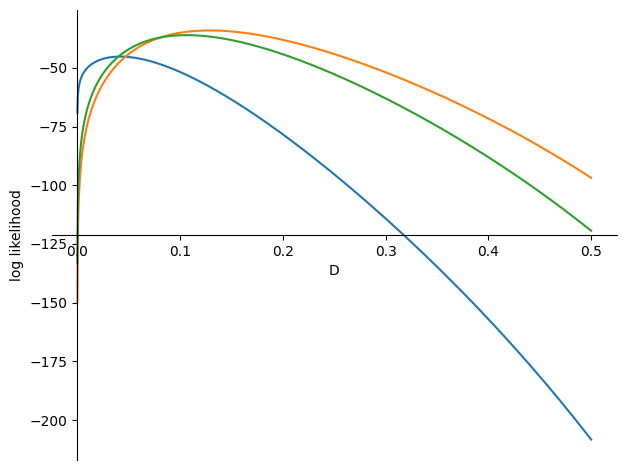

In [4]:
idict1 = {rho: 0.20, t:4, l: 1, h: 14, k:29, u: 150-29+1-10, c[0]: 8, c[1]: 1, c[2]: 0, c[3]: 1, c[4]: 0}
idict2 = {rho: 0.20, t:4, l: 1, h: 14, k:29, u: 150-29+1-6, c[0]: 0, c[1]: 0, c[2]: 3, c[3]: 2, c[4]: 1}
idict3 = {rho: 0.20, t:4, l: 1, h: 14, k:29, u: 150-29+1-7, c[0]: 0, c[1]: 0, c[2]: 7, c[3]: 0, c[4]: 0}
p = plot(-L.subs(idict1),-L.subs(idict2), -L.subs(idict3), (d, 0.0001, 0.5), xlabel="D", ylabel="log likelihood")
# p.save("../figures/likelihood_example.pdf")

In [5]:
print(minimize_scalar(lambdify(d, L.subs(idict1)), bounds=(0, 1), method='bounded'))
print(minimize_scalar(lambdify(d, L.subs(idict2)), bounds=(0, 1), method='bounded'))
print(minimize_scalar(lambdify(d, L.subs(idict3)), bounds=(0, 1), method='bounded'))

 message: Solution found.
 success: True
  status: 0
     fun: 45.226121953871385
       x: 0.04177084520451705
     nit: 14
    nfev: 14
 message: Solution found.
 success: True
  status: 0
     fun: 34.107898636458934
       x: 0.12888800974315562
     nit: 13
    nfev: 13
 message: Solution found.
 success: True
  status: 0
     fun: 36.099321532046595
       x: 0.10627414486465886
     nit: 12
    nfev: 12
